<a href="https://colab.research.google.com/github/aradjabova/dsc-capstone-project-v2-online-ds-ft-120919/blob/master/simple_cnn_94_acc_train_75_acc_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import os, os.path
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, SeparableConv2D, Activation, GaussianNoise, Input, UpSampling2D
from keras import backend as K
from imblearn.over_sampling import SMOTE
from keras.preprocessing import image
from keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import load_img




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Functions

In [0]:
def show_img(image_path):
  import numpy as np
  img = np.random.rand(150,150,3)
  img_path = image_path
  img = image.load_img(img_path, target_size=(150, 150))
  x = image.img_to_array(img)
  plt.figure(figsize=(8,8))
  plt.imshow(x/255.)
  plt.show()

In [0]:
def make_img_df(labels_list, directory, name_imgs='train', imgs='.jpg', labels=True):

  data = []

  if labels:

    for num in range(len(labels_list)):
      path = directory / labels_list[num]
      name = str(labels_list[num])
      names = name_imgs +'_' + str(labels_list[num])
      img_path = path.glob('*'+ imgs)


    # Go through all the normal cases. The label for these cases will be 0
      for img in img_path:
        # pic = np.random.rand(150,150,3)
        # pic = image.load_img(img, target_size=(150, 150))
        # x = image.img_to_array(pic)
        data.append((img, name))
        
    df = pd.DataFrame(data, columns=['image_path', 'label'],index=None)
    df = df.sample(frac=1.).reset_index(drop=True)

    return df
  
  else:

    for num in range(len(labels_list)):
      path = directory 
      name = str(labels_list[num])
      names = name_imgs +'_' + str(labels_list[num])
      img_path = path.glob('*'+ imgs)


    # Go through all the normal cases. The label for these cases will be 0
      for img in img_path:
        data.append((img, 'None'))


        
    df = pd.DataFrame(data, columns=['image_path', 'label'],index=None)
    df = df.sample(frac=1.).reset_index(drop=True)


    return df

In [0]:
def path_to_array(image_path):
  img = np.random.rand(150,150,3)
  img_path = image_path
  img = image.load_img(img_path, target_size=(150, 150))
  x = image.img_to_array(img)
  return x

# Load Images From kaggle

In [0]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Capstone/Kaggle"
# # /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [0]:
# %cd /content/drive/My Drive/Capstone/Kaggle

In [0]:
# pwd

In [0]:
# !kaggle datasets download -d puneet6060/intel-image-classification

In [0]:
# !ls

In [0]:
# #unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zip

In [0]:
# !ls

# Creating Dataframe of images

In [0]:
path_train = Path('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train')
path_test = Path('/content/drive/My Drive/Capstone/Kaggle/seg_test/seg_test')
path_pred = Path('/content/drive/My Drive/Capstone/Kaggle/seg_pred/seg_pred')

In [0]:
categories = ['buildings','forest','glacier','mountain','sea','street']

In [0]:
# train_df = make_img_df(categories, path_train)
# test_df = make_img_df(categories, path_test, name_imgs='test')
# pred_df = make_img_df(categories, path_pred, name_imgs='pred', labels=False)

Buildings


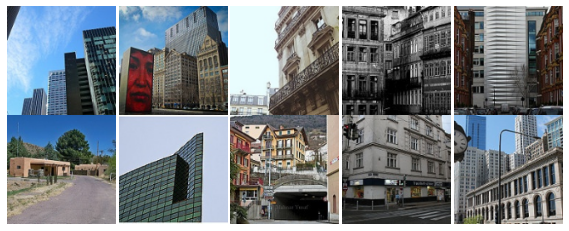

In [0]:
import cv2
print('Buildings')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/buildings/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Forest


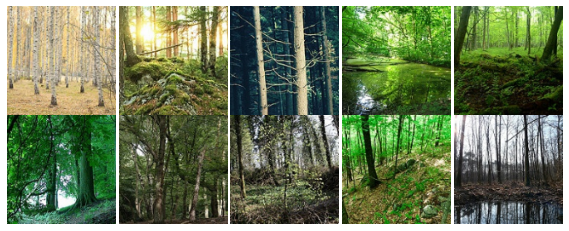

In [0]:
import cv2
print('Forest')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/forest/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Glacier


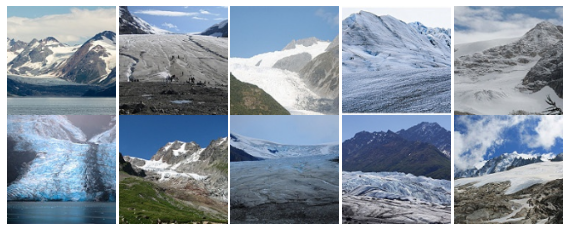

In [0]:
import cv2
print('Glacier')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/glacier/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Mountain


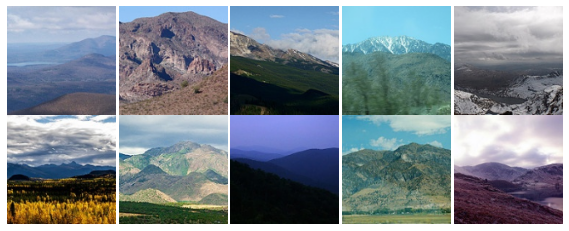

In [0]:
import cv2
print('Mountain')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/mountain/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Sea


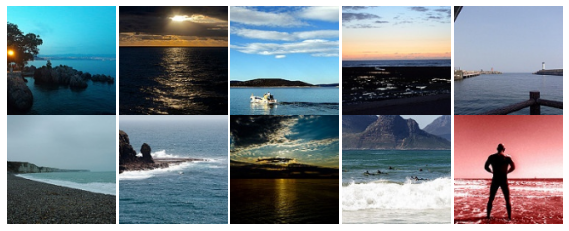

In [0]:
import cv2
print('Sea')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/sea/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Street


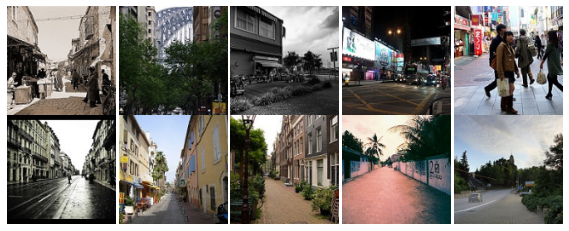

In [0]:
import cv2
print('Street')
multipleImages = glob.glob('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train/street/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [0]:
# cases_count = train_df['label'].value_counts()

# plt.figure(figsize=(13,8))
# sns.barplot(x=cases_count.index, y= cases_count.values)
# plt.title('Number of cases', fontsize=14)
# plt.xlabel('Case type', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()

The difference of images is not super wide!

- maybe will smote images?
- if not i dont think it will cause a difference but will test.

In [0]:
# show_img(train_df.image_path[2])

In [0]:
# show_img(train_df.image_path[3])

Awesome!


My images are 150, 150, 3

# CNN plain

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.3, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path_train,
         target_size=(256, 256),

        # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    path_test,
             target_size=(256, 256),

    # target_size=(240, 240),
    # batch_size=16,
    class_mode='categorical')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
input_shape = (256, 256, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 8)       2312      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [0]:
train= model.fit_generator(train_generator,
                           validation_data=test_generator,
                          #  steps_per_epoch=100,
                           callbacks=[checkpoint],
                           epochs=10) 


Epoch 1/10
439/439 [==============================] - 810s 2s/step - loss: 1.0715 - accuracy: 0.5839 - val_loss: 0.6739 - val_accuracy: 0.6723

Epoch 00001: loss improved from inf to 1.07169, saving model to best_model.hdf5
Epoch 2/10
439/439 [==============================] - 810s 2s/step - loss: 0.7920 - accuracy: 0.7034 - val_loss: 1.0440 - val_accuracy: 0.6900

Epoch 00002: loss improved from 1.07169 to 0.79249, saving model to best_model.hdf5
Epoch 3/10
439/439 [==============================] - 808s 2s/step - loss: 0.6509 - accuracy: 0.7588 - val_loss: 0.9222 - val_accuracy: 0.7133

Epoch 00003: loss improved from 0.79249 to 0.65090, saving model to best_model.hdf5
Epoch 4/10
439/439 [==============================] - 803s 2s/step - loss: 0.5431 - accuracy: 0.8045 - val_loss: 0.4663 - val_accuracy: 0.7473

Epoch 00004: loss improved from 0.65090 to 0.54320, saving model to best_model.hdf5
Epoch 5/10
439/439 [==============================] - 803s 2s/step - loss: 0.4630 - accuracy

In [0]:
model.evaluate_generator(test_generator)

[1.0329686403274536, 0.7566666603088379]

In [0]:
pred = model.predict_generator(test_generator)
pred = np.argmax(pred, axis=1)

In [0]:
accuracy=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(10))


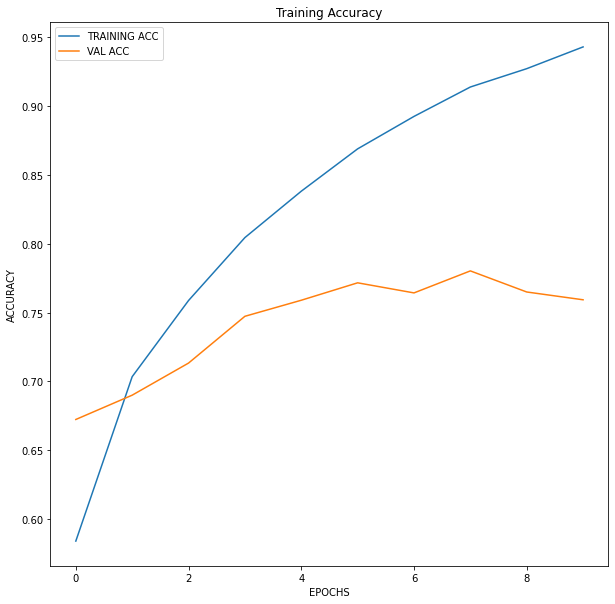

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.title('Training Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

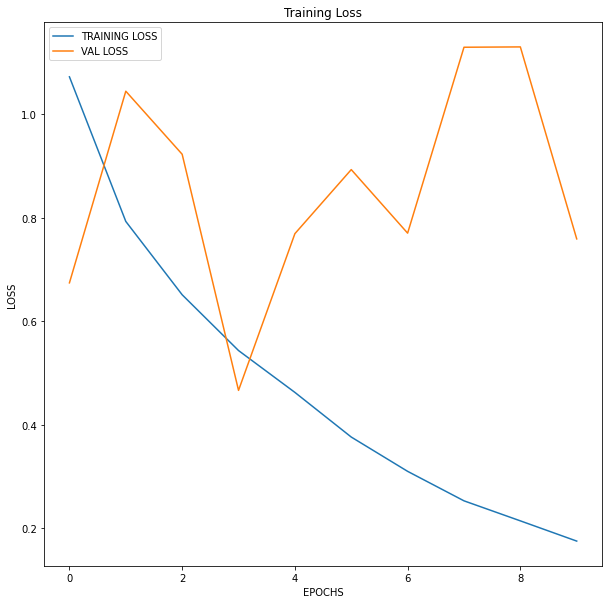

In [0]:
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS']) 
plt.title('Training Loss')
plt.show()

In [0]:
print(classification_report(test_generator.labels, pred))

              precision    recall  f1-score   support

           0       0.17      0.16      0.16       437
           1       0.16      0.15      0.15       474
           2       0.18      0.18      0.18       553
           3       0.17      0.20      0.19       525
           4       0.16      0.12      0.14       510
           5       0.17      0.21      0.19       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



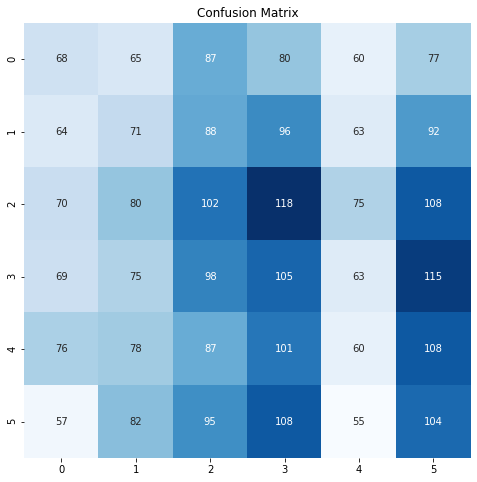

In [0]:
cm = confusion_matrix(test_generator.labels, pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.3g', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [0]:
recall_score(test_generator.labels, pred, average='micro')

0.17

# Autoencoder function


In [0]:
def autoencoder():
  input_img = Input(shape=(256,256,3))
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  # x = MaxPooling2D((2, 2), padding='same')(x)
  # x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same')(x)

  # x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
  # x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mse',
                    metrics=['accuracy','mse'])

  return autoencoder



In [0]:
autoencoder = autoencoder()

In [0]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
up_sampling2d_29 (UpSampling (None, 128, 128, 32)      0  

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.3, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path_train,
         target_size=(256, 256),

        # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='input')

test_generator = test_datagen.flow_from_directory(
    path_test,
             target_size=(256, 256),

    # target_size=(240, 240),
    # batch_size=16,
    class_mode='input')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
auto = autoencoder.fit_generator(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
439/439 [==============================] - 5355s 12s/step - loss: 0.0100 - accuracy: 0.7405 - mse: 0.0100 - val_loss: 0.0065 - val_accuracy: 0.7796 - val_mse: 0.0060
Epoch 2/5


KeyboardInterrupt: ignored

In [0]:
autoencoder.evaluate_generator(test_generator1)

[0.002506619319319725, 0.8418180346488953, 0.0024517651181668043]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


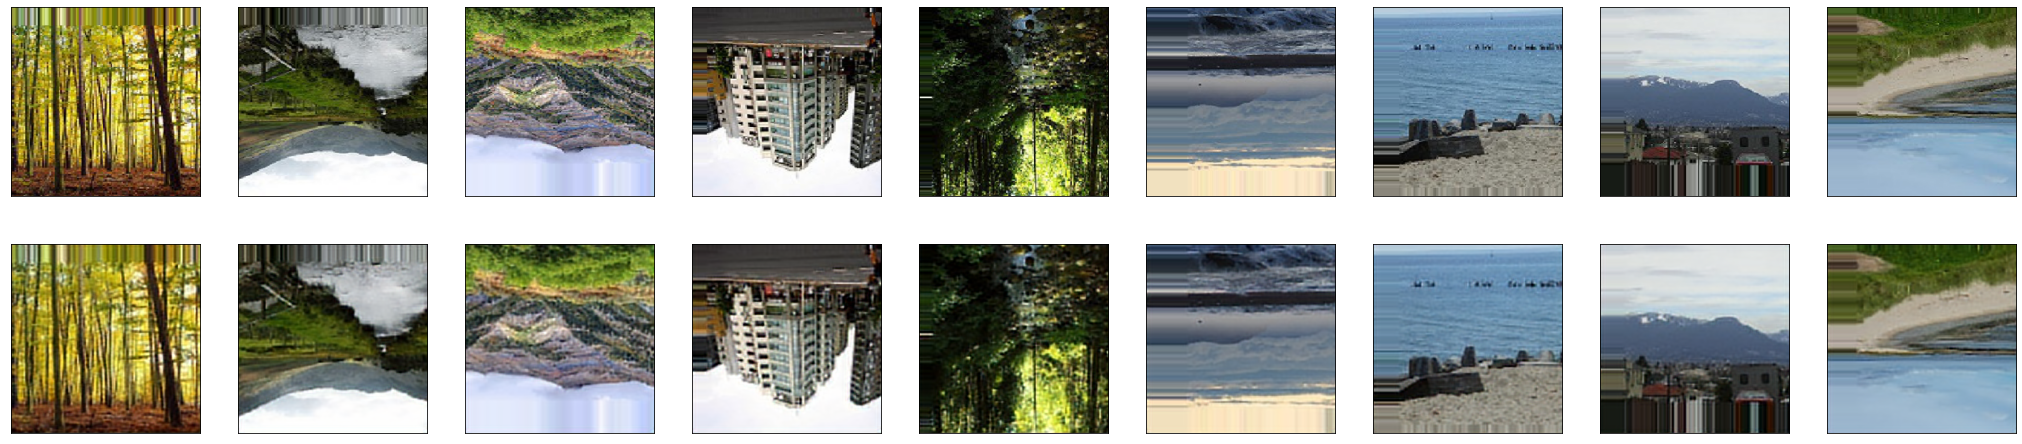

In [0]:
x_test, y_test = test_generator.next()
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(40, 8))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [0]:
x_train_img_aug = autoencoder.predict_generator(train_generator1)
y_train_label = autoencoder.labels